# Project Objective:
#### - Performed data cleaning and preprocessing on Obesity Risk  ensuring data quality and integrity.
####  Multi-Class Prediction of Obesity Risk which is related to cardiovascular disease.



# 🌟 Business Understanding:

| Variable                           | Type         | Description                                                                                  |
|------------------------------------|--------------|----------------------------------------------------------------------------------------------|
| Gender                             | Categorical  | Biological sex of the individual (male or female)                                            |
| Age                                | Numerical    | Age of the individual in years                                                               |
| Height                             | Numerical    | Height of the individual in meters                                                           |
| Weight                             | Numerical    | Weight of the individual in kilograms                                                        |
| Family history of overweight      | Categorical  | Indicates if the individual has a family member who is overweight or obese (yes or no)       |
| Frequently consumed high-calorie food (FAVC) | Categorical | Indicates if the individual often eats high-calorie food (yes or no)                          |
| Frequency of consumption of vegetables (FCVC) | Ordinal   | Indicates how often the individual eats vegetables (1 = never, 2 = sometimes, 3 = always)     |
| Number of main meals (NCP)        | Ordinal      | Indicates the number of main meals the individual has daily (1 = between 1 and 2, 2 = three, 3 = more than three, 4 = no answer) |
| Consumption of food between meals (CAEC) | Ordinal  | Indicates how often the individual eats food between meals (1 = no, 2 = sometimes, 3 = frequently, 4 = always) |
| SMOKE                              | Categorical  | Indicates whether the individual smokes or not (yes or no)                                    |
| Consumption of water daily (CH2O) | Ordinal      | Indicates how much water the individual drinks daily (1 = less than a liter, 2 = between 1 and 2 L, 3 = more than 2 L) |
| Monitor calorie intake (SCC)      | Categorical  | Indicates if the individual keeps track of their caloric intake (yes or no)                   |
| Frequency of physical activity (FAF) | Ordinal    | Indicates how often the individual engages in physical activity (1 = never, 2 = once or twice a week, 3 = two or three times a week, 4 = four or five times a week) |
| Time using electronic devices (TUE) | Ordinal     | Indicates how long the individual uses electronic devices (0 = none, 1 = less than an hour, 2 = between one and three hours, 3 = more than three hours) |
| Consumption of alcohol (CALC)      | Ordinal      | Indicates how often the individual drinks alcohol (1 = no, 2 = sometimes, 3 = frequently, 4 = always) |
| Type of transportation used (MTRANS) | Categorical | Indicates the type of transportation the individual uses (automobile, motorbike, bike, public transportation, walking) |
| Level of obesity according to body mass index (NObesity) | Ordinal | Indicates the obesity level of the individual according to their BMI (insufficient weight, normal weight, overweight level I, overweight level II, obesity type I, obesity type II, obesity type III) |


# 📚 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline

# ⏳ Loading Dataset

In [2]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")

In [3]:
df.head(5)

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

# 🧠 Basic Understaning of Data

In [4]:
list_of_numerics=df.select_dtypes(include=['float','int']).columns
types= df.dtypes
missing= round((df.isnull().sum()/df.shape[0]),3)*100
overview= df.apply(lambda x: [round(x.min()),
                                 round(x.max()),
                                 round(x.mean()),
                                 round(x.quantile(0.5))] if x.name in list_of_numerics else x.unique())

outliers= df.apply(lambda x: sum(
                                 (x<(x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))))|
                                 (x>(x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))))
                                 if x.name in list_of_numerics else ''))

explo = pd.DataFrame({'Types': types,
                      'Missing%': missing,
                      'Overview': overview,
                      'Outliers': outliers}).sort_values(by=['Missing%','Types'],ascending=False)
explo.transpose()

Gender family_history_with_overweight       FAVC  \
Types             object                         object     object   
Missing%             0.0                            0.0        0.0   
Overview  [Male, Female]                      [yes, no]  [yes, no]   
Outliers               0                              0          0   

                                         CAEC      SMOKE        SCC  \
Types                                  object     object     object   
Missing%                                  0.0        0.0        0.0   
Overview  [Sometimes, Frequently, no, Always]  [no, yes]  [no, yes]   
Outliers                                    0          0          0   

                                 CALC  \
Types                          object   
Missing%                          0.0   
Overview  [Sometimes, no, Frequently]   
Outliers                            0   

                                                     MTRANS  \
Types                                                object   
Missing%                                                0.0   
Overview  [Public_Transportation, Automobile, Walking, M...   
Outliers                                                  0   

                                                 NObeyesdad               Age  \
Types                                                object           float64   
Missing%                                                0.0               0.0   
Overview  [Overweight_Level_II, Normal_Weight, Insuffici...  [14, 61, 24, 23]   
Outliers                                                  0              1074   

                Height             Weight          FCVC           NCP  \
Types          float64            float64       float64       float64   
Missing%           0.0                0.0           0.0           0.0   
Overview  [1, 2, 2, 2]  [39, 165, 88, 84]  [1, 3, 2, 2]  [1, 4, 3, 3]   
Outliers             4                  0             0          6052   

                  CH2O           FAF           TUE                        id  
Types          float64       float64       float64                     int64  
Missing%           0.0           0.0           0.0                       0.0  
Overview  [1, 3, 2, 2]  [0, 3, 1, 1]  [0, 2, 1, 1]  [0, 20757, 10378, 10378]  
Outliers             0             0             0                         0

#### 1- No Missing Values: Each column has a complete set of values for all `20,758 `entries

#### 2- Consider converting `'Age,' 'Height,' 'Weight,' 'FCVC,' 'NCP,' 'CH2O,' 'FAF,' and 'TUE' `to their respective integer types if the decimal values are not crucial for analysis

#### 3- Categorical columns such as `'Gender,' 'family_history_with_overweight,' 'FAVC,' 'CAEC,' 'SMOKE,' 'SCC,' 'CALC,' 'MTRANS,' and 'NObeyesdad'` may require encoding for better compatibility with machine learning models

In [5]:
df.describe().T

count          mean          std    min          25%           50%  \
id      20758.0  10378.500000  5992.462780   0.00  5189.250000  10378.500000   
Age     20758.0     23.841804     5.688072  14.00    20.000000     22.815416   
Height  20758.0      1.700245     0.087312   1.45     1.631856      1.700000   
Weight  20758.0     87.887768    26.379443  39.00    66.000000     84.064875   
FCVC    20758.0      2.445908     0.533218   1.00     2.000000      2.393837   
NCP     20758.0      2.761332     0.705375   1.00     3.000000      3.000000   
CH2O    20758.0      2.029418     0.608467   1.00     1.792022      2.000000   
FAF     20758.0      0.981747     0.838302   0.00     0.008013      1.000000   
TUE     20758.0      0.616756     0.602113   0.00     0.000000      0.573887   

                 75%           max  
id      15567.750000  20757.000000  
Age        26.000000     61.000000  
Height      1.762887      1.975663  
Weight    111.600553    165.057269  
FCVC        3.000000      3.000000  
NCP         3.000000      4.000000  
CH2O        2.549617      3.000000  
FAF         1.587406      3.000000  
TUE         1.000000      2.000000

#### The numbers seem realistic

#🧹 Data Preprocessing Part-1

In [6]:
columns= ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in columns:
    df[column]=df[column].round()

In [7]:
# Mapping for each ordinal column
fcvc_mapping = {1: 'never', 2: 'sometimes', 3: 'always'}
ncp_mapping = {1: 'between_1_and_2', 2: 'three', 3: 'more_than_three', 4: 'no_answer'}
ch2o_mapping = {1: 'less_than_a_liter', 2: 'between_1_and_2 L', 3: 'more_than_2 L'}
faf_mapping = {0: 'never', 1: 'once_or_twice_a_week', 2: 'two_or_three_times_a_week', 3: 'four_or_five_times_a_week'}
tue_mapping = {0: 'none', 1: 'less_than_an_hour', 2: 'between_one_and_three_hours', 3: 'more_than_three_hours'}
column_to_map=['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
mappings = [fcvc_mapping, ncp_mapping, ch2o_mapping, faf_mapping, tue_mapping]

for column, mapping in zip(column_to_map, mappings):
    df[column] = df[column].map(mapping)


# 📊 Exploatory Data Analysis

## Distribution of `Target` Variable (NObesity):
#### 1-What is the distribution of obesity levels in the dataset?

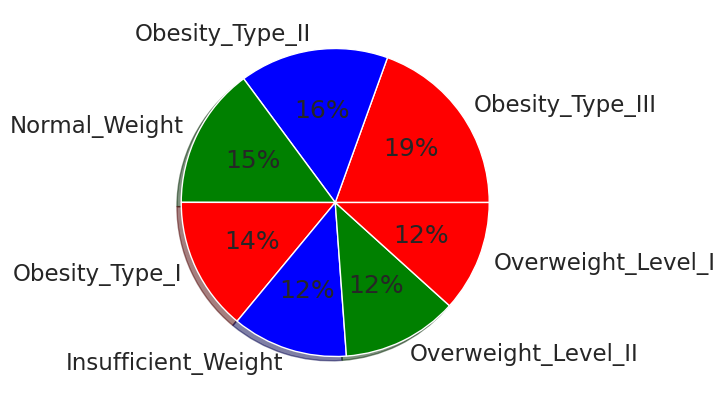

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.pie(df['NObeyesdad'].value_counts(), labels=df['NObeyesdad'].value_counts().index, autopct='%1.0f%%', shadow=True, colors=['red', 'blue', 'green'])
plt.show()



## Observation: I think this is an imbalanced data

##2- What is the distribution of obesity levels within each gender?

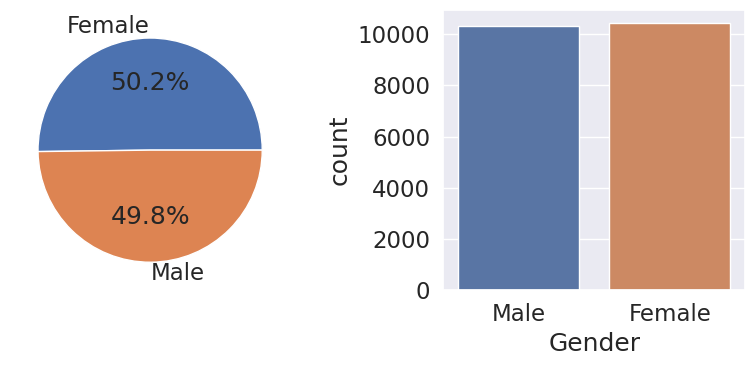

In [9]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.pie(df["Gender"].value_counts(),labels=df["Gender"].value_counts().index,autopct='%1.1f%%')
# plt.figure(figsize=(5,3))
plt.subplot(1,2,2)
sns.countplot(df, x="Gender", hue="Gender")
plt.tight_layout()
plt.show()

## By Plotly

In [10]:
import plotly.graph_objs as go
import plotly.express as px

fig = px.histogram(df, x='Gender', color='NObeyesdad')
fig.update_layout(
    title='Distribution of NObeyesdad by Gender',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Count')
)
fig.show()


<Axes: xlabel='NObeyesdad', ylabel='count'>

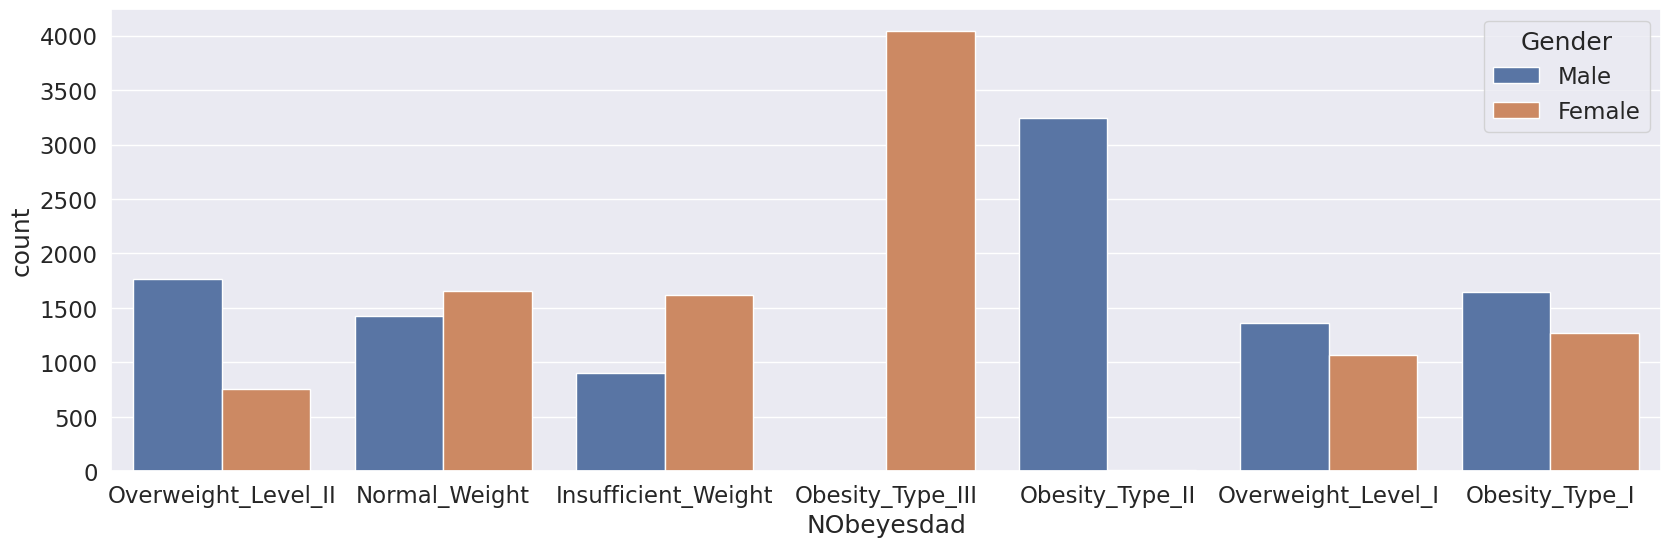

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(df, x="NObeyesdad", hue="Gender")


#### 1- The difference between` obesity and overweight`: For adults, WHO defines overweight and obesity as follows: `overweight `is a BMI` greater than or equal to 25`; and. `obesity `is a BMI `greater than or equal` to 30.01
## 🔍Observations:
`Overweight_Level_II`: This term likely refers to a higher level of overweight --> Result: Male > Female

◼️ `Normal_Weight`: This term refers to individuals who fall within the healthy weight range --> Result: Male less than Female, They are so close

◼️ `Insufficient_Weight`: This term is less common and may refer to individuals who are underweight --> Result: Male less than Female

◼️ `Obesity_Type_III`: This term typically represents the highest level of obesity --> Result: Male less than Female, They are so far

◼️` Obesity_Type_II`: This term likely refers to a second high level of obesity --> Result: Male > Female, They are so far

◼️ `Overweight_Level_I`: This term likely indicates a lower level of overweight --> Result: Male > Female

◼️ `Obesity_Type_I`: This term typically represents a lower level of obesity --> Result: Male > Female

🤷‍♀️`Males have more problems like`: Overweight_Level_I, Overweight_Level_II, Obesity_Type_I ,Obesity_Type_II(danger)

🤦‍♀️`Females have more dangeroues problems like`: Insufficient_Weight, Obesity_Type_III(danger)



# - Age Distribution:
### - How is the age distributed in the dataset?

##Is there a correlation between age and obesity levels?

In [12]:
df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [13]:
df['Age'].skew()

1.5862517094133515

In [14]:
fig = px.box(df, x="Age", y="NObeyesdad", title="Age Distribution by NOBeyesdad Category")
fig.update_traces(marker=dict(color='blue'))
fig.update_layout(xaxis_title="NOBeyesdad Category", yaxis_title="Age")
fig.show()

#### 📝 Note: The age that is commonly found between 16 and 35 and the rest of Age column is realistic data so no problem here

## 4- Height and Weight Relationship:
* How are height and weight distributed in the dataset?

* Is there a correlation between height, weight, and obesity levels?


In [15]:
fig = px.scatter(df, x="Height", y="Weight", color="NObeyesdad",
                 title="Relationship between Height, Weight, and NObeyesdad",
                 labels={"Height": "Height (cm)", "Weight": "Weight (kg)"},
                 category_orders={"NObeyesdad": ["Insufficient_Weight", "Normal", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]}
                )

# Show the plot
fig.show()

#### correlation matrix

In [16]:
# Convert obesity levels to numeric values for correlation matrix
obesity_levels = {'Normal_Weight': 0, 'Overweight_Level_I': 1, 'Overweight_Level_II': 2, 'Obesity_Type_I': 3, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5,'Insufficient_Weight':6}
df['NObesity_numeric'] = df['NObeyesdad'].map(obesity_levels)

In [17]:
df.head(3)

id  Gender        Age    Height     Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998  81.669950                            yes   
1   1  Female  18.000000  1.560000  57.000000                            yes   
2   2  Female  18.000000  1.711460  50.165754                            yes   

  FAVC       FCVC              NCP        CAEC SMOKE               CH2O SCC  \
0  yes  sometimes  more_than_three   Sometimes    no      more_than_2 L  no   
1  yes  sometimes  more_than_three  Frequently    no  between_1_and_2 L  no   
2  yes  sometimes  between_1_and_2   Sometimes    no  between_1_and_2 L  no   

                    FAF                          TUE       CALC  \
0                 never            less_than_an_hour  Sometimes   
1  once_or_twice_a_week            less_than_an_hour         no   
2  once_or_twice_a_week  between_one_and_three_hours         no   

                  MTRANS           NObeyesdad  NObesity_numeric  
0  Public_Transportation  Overweight_Level_II                 2  
1             Automobile        Normal_Weight                 0  
2  Public_Transportation  Insufficient_Weight                 6

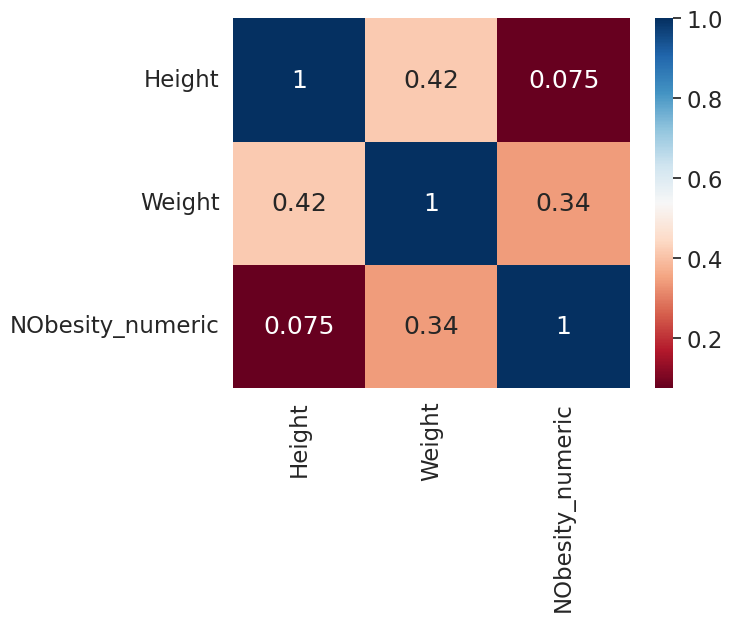

In [18]:
correlation_matrix=df[['Height', 'Weight', 'NObesity_numeric']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu')
plt.show()

## 5- Family History of Overweight:
* What is the distribution of obesity levels among individuals with and without a family history of overweight?

In [19]:
df["family_history_with_overweight"].value_counts()

family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64

In [20]:
fig = px.sunburst(df, path=['family_history_with_overweight', 'NObeyesdad'])

# Update layout
fig.update_layout(
    title="Family History with Overweight and NObeyesdad Relation",
    title_font_size=20
)

# Show plot
fig.show()

##🔍Observations:
* There is a strong correlation between the Family history (yes) and obesity level (Gentics)

## 6- High-Calorie Food Consumption (FAVC):
* How many `individuals frequently` consume high-calorie food?

* What is the distribution of obesity levels among those `who do and do not` consume high-calorie food frequently?

In [21]:
df["FAVC"].value_counts()

FAVC
yes    18982
no      1776
Name: count, dtype: int64

 #### In `FAVC `feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to overfitting in our model.

In [22]:
fig = px.histogram(df, x="FAVC", color="NObeyesdad", barmode="group")
fig.update_layout(
    title="High-Calorie Food Consumption and Relation with NObeyesdad",
    xaxis_title="High-Calorie Food Consumption (FAVC)",
    yaxis_title="Count",
)
fig.show()

### 🔍Observation: Eating foods that contain a lot of calories leads to obesity

In [23]:
fig = px.histogram(df, x="FAVC", color="NObeyesdad", barmode="group", facet_col="Gender", category_orders={"Gender": ["Male", "Female"]})
fig.update_layout(
    title="High-Calorie Food Consumption and Relation with NObeyesdad (Split by Gender)",
    xaxis_title="High-Calorie Food Consumption (FAVC)",
    yaxis_title="Count",
)
fig.show()

### 7- Vegetable Consumption (FCVC) and Main Meals (NCP):
* How often do individuals eat vegetables (FCVC) and how many main meals do they have (NCP)?

* Is there a relationship between vegetable consumption, main meals, and obesity levels?

In [24]:
grouped_data = df.groupby(['FCVC', 'NObeyesdad']).size().reset_index(name='count')

# Plotting
fig = px.bar(grouped_data, x="FCVC", y="count", color="NObeyesdad",
             barmode="group", title="Vegetable Consumption vs Obesity Type",
             labels={"count": "Frequency", "FCVC": "Vegetable Consumption", "NObeyesdad": "Obesity Type"})

fig.show()

## 🔍Observations:
* There is a strong realtion between eating vegetables and Obesity Type_|||

* There's a conflict between no eating vegetables and obesity level

In [25]:
df_grouped = df.groupby(["FCVC", "Gender", "NObeyesdad"]).size().reset_index(name="count")

# Plotting with Plotly
fig = px.bar(df_grouped, x="FCVC", y="count", color="NObeyesdad", barmode="group",
             facet_row="Gender",
             title="Relationship Between FCVC (Vegetable Consumption) and NObeyesdad by Gender",
             labels={"count": "Count", "FCVC": "Vegetable Consumption Category", "NObeyesdad": "Obesity Type", "Gender": "Gender"})
fig.update_layout(xaxis=dict(categoryorder='array', categoryarray=["Low", "Moderate", "High"]))
fig.show()

### 🔍Observations:
##There is a strong realtion between eating `vegetables` for `Female` and ` Obesity Type_|||`

In [26]:
df_grouped = df.groupby(["FCVC", "Gender", "family_history_with_overweight", "NObeyesdad"]).size().reset_index(name="count")

# Plotting with Plotly
fig = px.bar(df_grouped, x="FCVC", y="count", color="NObeyesdad", barmode="group",
             facet_row="Gender",
             facet_col="family_history_with_overweight",
             title="Relationship Between FCVC (Vegetable Consumption), family_history_with_overweight, and NObeyesdad by Gender",
             labels={"count": "Count", "FCVC": "Vegetable Consumption Category", "NObeyesdad": "Obesity Type", "Gender": "Gender", "family_history_with_overweight": "Family History with Overweight"})
fig.update_layout(xaxis=dict(categoryorder='array', categoryarray=["Low", "Moderate", "High"]))
fig.show()

### 🔍Observations:
### There is a strong realtion between eating `vegetables` for `Female` which have `family_history_with_overweight`  and `Obesity Type_|||`

## Main Meals (NCP)
* how many main meals do they have (NCP)?

* Is there a relationship between main meals, and obesity levels?

In [27]:
fig = px.histogram(df, x="NCP", color="NObeyesdad",
                   barmode='group',
                   title='Relation between NCP (Main Meals) and NObeyesdad (Obesity Level)')
fig.update_layout(xaxis_title="NCP (Main Meals)", yaxis_title="Count", legend_title="Obesity Level")
fig.update_xaxes(type='category')
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.show()

## 🔍Observations:
* There is a strong realtion between NCP (more_than_three) and Obesity

In [28]:
fig = px.histogram(df, x="NCP", color="NObeyesdad", facet_col="Gender",
                   barmode='group',
                   title='Relation between NCP (Main Meals), Gender and NObeyesdad (Obesity Level)')
fig.update_layout(xaxis_title="NCP (Main Meals)", yaxis_title="Count", legend_title="Obesity Level")
fig.update_xaxes(type='category')
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.show()

#### There is a strong realtion between eating `more_than_three` for `Female` and  `Obesity Type_|||`
#### There is a strong realtion between eating `more_than_three` for `male` and  `Obesity Type_||`

In [29]:
# Plot
fig = px.histogram(df, x="NCP", color="NObeyesdad", facet_col="Gender", facet_row="family_history_with_overweight",
                   barmode='group',
                   title='Relation between NCP (Main Meals), Gender, family_history_with_overweight and NObeyesdad (Obesity Level)')
fig.update_layout(xaxis_title="NCP (Main Meals)", yaxis_title="Count", legend_title="Obesity Level")
fig.update_xaxes(type='category')
fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.show()

#### There is a strong realtion between eating `more_than_three` for `Female` which have `family_history_with_overweight` and  `Obesity Type_|||`
#### There is a strong realtion between eating `more_than_three` for `male` whaich have `family_history_with_overweight` and  `Obesity Type_||`

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  object 
 8   NCP                             20758 non-null  object 
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  object 
 12  SCC                             

## 8- CAEC: Eating between Meals
* What is the distribution of CAEC?

* Is there a relationship between CAEC and obesity levels?

In [31]:
df["CAEC"].value_counts()

CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

In [32]:
cross_tab = pd.crosstab(df['CAEC'], df['NObeyesdad'])

# Create a stacked bar chart
fig = px.bar(cross_tab,
             barmode='stack',
             labels={'value': 'Count', 'CAEC': 'Eating Between Meals', 'NObeyesdad': 'Obesity Class'},
             title='Relationship between Eating Between Meals and Obesity Class')
fig.show()

##🔍Observations:
* There is a strong correlation between the CAEC( Eating between Meals) and obesity level ()

### 9- Smoking `(SMOKE)` and Alcohol Consumption (CALC) and (FCVC):
* How many individuals smoke and/or consume alcohol?

* What is the distribution of obesity levels among smokers and non-smokers, as well as among individuals with different alcohol consumption levels?

In [33]:
df["SMOKE"].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

In [34]:
cross_tab = pd.crosstab(df['SMOKE'], df['NObeyesdad'])

# Create a stacked bar chart
fig = px.bar(cross_tab,
             barmode='stack',
             labels={'value': 'Count', 'CAEC': 'Eating Between Meals', 'NObeyesdad': 'Obesity Class'},
             title='Relationship between Eating Between Meals and Obesity Class')
fig.show()

 ` In  SMOKE` feature we can observe that `one cateogry` is `dominating` other category too much. So it doesn't seem to be usefull feature because it can `lead to ` `overfitting` in our model.

## `SCC` (Monitor calorie intake)

In [35]:
df["SCC"].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

 ##### In `SCC` feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to overfitting in our model.

## `Physical Activity` (FAF) and `Electronic Device Usage` (TUE):
### How often do individuals engage in physical activity `(FAF)`?

### Is there a correlation between `physical activity`, `electronic device usage`, and `obesity levels`?

In [36]:
df["FAF"].value_counts()

FAF
once_or_twice_a_week         8264
never                        6921
two_or_three_times_a_week    4525
four_or_five_times_a_week    1048
Name: count, dtype: int64

In [37]:
# Creating the Plotly chart
fig = px.box(df, x='FAF', y='NObeyesdad', color='Gender', title='Physical Activity (FAF) vs. NObeyesdad',
             labels={'FAF': 'Physical Activity (FAF)', 'NObeyesdad': 'Obesity Level'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [38]:
fig = px.histogram(df, x="FAF", color="NObeyesdad", title="Physical Activity (FAF) vs NObeyesdad",
                   labels={"FAF": "Physical Activity (FAF)", "NObeyesdad": "Obesity Type"},
                   category_orders={"NObeyesdad": [
                       "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
                   ]}
                  )

fig.update_layout(barmode='group')

# Show plot
fig.show()

In [39]:
fig = px.histogram(df, x="FAF", color="NObeyesdad", title="Physical Activity (FAF) vs NObeyesdad (Grouped by Gender)",
                   labels={"FAF": "Physical Activity (FAF)", "NObeyesdad": "Obesity Type"},
                   category_orders={"NObeyesdad": [
                       "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
                   ]},
                   facet_col="Gender"
                  )

fig.update_layout(barmode='group')

# Show plot
fig.show()

### `Four or Five times per week` is so good for body --> not subjected to obesity level

#### `No physical Activity` -->` High risk of obesity`
* There is a strong correlation between the female which` never(physical Activity``) and `obesity level |||` ()

In [40]:
fig = px.histogram(df, x="FAF", color="NObeyesdad", title="Physical Activity (FAF) vs NObeyesdad (Grouped by Gender and Family History with Overweight)",
                   labels={"FAF": "Physical Activity (FAF)", "NObeyesdad": "Obesity Type", "family_history_with_overweight": "Family History with Overweight"},
                   category_orders={"NObeyesdad": [
                       "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
                   ]},
                   facet_col="family_history_with_overweight",
                   facet_row="Gender"
                  )

fig.update_layout(barmode='group')

# Show plot
fig.show()

In [41]:
fig = px.histogram(df, x="FAF", color="NObeyesdad", title="Physical Activity (FAF) vs NObeyesdad (Grouped by Gender and Main Meals)",
                   labels={"FAF": "Physical Activity (FAF)", "NObeyesdad": "Obesity Type", "NCP": "Main Meals (NCP)"},
                   category_orders={"NObeyesdad": [
                       "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
                   ]},
                   facet_col="Gender",
                   facet_row="NCP",
                   histfunc="count"
                  )

fig.update_layout(barmode='group')

# Show plot
fig.show()

 ### Electronic Device Usage (TUE)

In [42]:
fig = px.histogram(df, x="TUE", color="NObeyesdad",
                   category_orders={"TUE": ["0-2 hours", "3-5 hours", "More than 5 hours"],
                                    "NObeyesdad": ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                                                   'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']},
                   labels={"TUE": "Electronic Device Usage", "NObeyesdad": "Weight Status"},
                   title="Electronic Device Usage vs Weight Status")
fig.update_layout(barmode='group')
fig.show()

## 11- Transportation Type (MTRANS):
* What is the distribution of transportation types used by individuals?

* Is there a relationship between transportation type and obesity levels?

In [43]:
df["MTRANS"].value_counts()

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

In [44]:
color_list = ['#357EC7', '#ff6666', '#9B9A96','#9F8C76', '#829F82','#7E354D','#ffb3e6']
fig =px.histogram(df, x='MTRANS' ,color='NObeyesdad',
             title='Distribution of Obesity Levels with Transportation Type',
                  labels={'MTRANS':'Transportation Type', 'Count': 'Count', 'NObeyesdad': 'Obesity Level'},
             barmode='group',color_discrete_map={category: color for category, color in zip(df['NObeyesdad'].unique(), color_list)})
fig.update_layout(width=900,height=500,font=dict(family='Arial', size=13, color='black'))

## 🔍Observations:
** Public Transportation is strong related to obesity level

* Walking is good way to be healthy

In [45]:
# Grouping data
grouped_data = df.groupby(['Gender', 'MTRANS', 'FAF'])['NObeyesdad'].count().reset_index()

# Creating Plotly chart
fig = go.Figure()

for gender in grouped_data['Gender'].unique():
    data = grouped_data[grouped_data['Gender'] == gender]
    fig.add_trace(go.Bar(
        x=[f"{row['MTRANS']} - {row['FAF']}" for _, row in data.iterrows()],
        y=data['NObeyesdad'],
        name=gender
    ))

fig.update_layout(
    title='Relationship Between Transportation Type, Physical Activity, and Obesity',
    xaxis=dict(title='Transportation Type - Physical Activity'),
    yaxis=dict(title='Count'),
    barmode='group',
)

fig.show()


## 12- Caloric Intake Monitoring (SCC):
* How many individuals monitor their caloric intake?

* Is there a correlation between caloric intake monitoring and obesity levels?

In [46]:
df["SCC"].value_counts()

SCC
no     20071
yes      687
Name: count, dtype: int64

In [47]:
color_list = ['#357EC7', '#ff6666', '#9B9A96','#9F8C76', '#829F82','#7E354D','#ffb3e6']
fig =px.histogram(df, x='SCC' ,color='NObeyesdad',
             title='Distribution of Obesity Levels with Calories Concentration ',
                  labels={'SCC':'Calories Concentration', 'Count': 'Count', 'NObeyesdad': 'Obesity Level'},
             barmode='group',color_discrete_map={category: color for category, color in zip(df['NObeyesdad'].unique(), color_list)})
fig.update_layout(width=900,height=500,font=dict(family='Arial', size=13, color='black'))

### 🔍Observations:
* Calories Concentration strongly related to obesity level
* ##### 💡 In `SCC` feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to `overfitting `in our model.

# **📈 Feature Engineering**

### Calculate BMI

In [48]:
def calculate_bmi_and_weight_status(data, weight_col='Weight', height_col='Height'):
    # Calculate BMI
    data['BMI'] = data[weight_col] / (data[height_col] ** 2)

    # BMI thresholds
    underweight_threshold = 18.5
    overweight_threshold = 25.0

    # New feature
    data['Weight_Status'] = pd.cut(data['BMI'], bins=[0, underweight_threshold, overweight_threshold, float('inf')],
                                   labels=['Underweight', 'Normal Weight', 'Overweight'])
    return data

In [49]:
# Age Groups: Group ages into categories (e.g., children, teenagers, adults, and seniors).
def create_age_features(data, age_col='Age'):
    # Age group bins
    age_bins = [0, 18, 35, 50, float('inf')]
    age_labels = ['0-18', '19-35', '36-50', '50+']

    # Create 'Age_Group' column
    data['Age_Group'] = pd.cut(data[age_col], bins=age_bins, labels=age_labels)

    # Age Squared
    data['Age_Squared'] = data[age_col] ** 2

    return data
# def categorize_age(age):
#     if age <= 18:
#         return 'Children/Teenagers'
#     elif 18 < age <= 30:
#         return 'Young Adults'
#     elif 30 < age <= 60:
#         return 'Adults'
#     else:
#         return 'Seniors'

# # Add Age Group feature
# df['Age_Group'] = df['Age'].apply(categorize_age)


In [50]:
df=calculate_bmi_and_weight_status(df)
df=create_age_features(df)

In [51]:
# def calculate_hcfs(favc, fcvc, ncp, caec, calc):
#     score = 0
#     if favc == 'yes':
#         score += 1
#     if fcvc == 3:
#         score += 1
#     if ncp == 4:
#         score += 1
#     if caec in [3, 4]:
#         score += 1
#     if calc in [3, 4]:
#         score += 1
#     return score

# # Add High-Calorie Food Score feature
# df['HCFS'] = df.apply(lambda row: calculate_hcfs(row['FAVC'], row['FCVC'], row['NCP'], row['CAEC'], row['CALC']), axis=1)

In [52]:
# df=calculate_hcfs(df)

In [53]:
df.head(5)

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC       FCVC              NCP        CAEC SMOKE               CH2O SCC  \
0  yes  sometimes  more_than_three   Sometimes    no      more_than_2 L  no   
1  yes  sometimes  more_than_three  Frequently    no  between_1_and_2 L  no   
2  yes  sometimes  between_1_and_2   Sometimes    no  between_1_and_2 L  no   
3  yes     always  more_than_three   Sometimes    no  between_1_and_2 L  no   
4  yes     always            three   Sometimes    no  between_1_and_2 L  no   

                         FAF                          TUE       CALC  \
0                      never            less_than_an_hour  Sometimes   
1       once_or_twice_a_week            less_than_an_hour         no   
2       once_or_twice_a_week  between_one_and_three_hours         no   
3       once_or_twice_a_week            less_than_an_hour  Sometimes   
4  two_or_three_times_a_week            less_than_an_hour  Sometimes   

                  MTRANS           NObeyesdad  NObesity_numeric        BMI  \
0  Public_Transportation  Overweight_Level_II                 2  28.259565   
1             Automobile        Normal_Weight                 0  23.422091   
2  Public_Transportation  Insufficient_Weight                 6  17.126706   
3  Public_Transportation     Obesity_Type_III                 5  44.855798   
4  Public_Transportation  Overweight_Level_II                 2  25.599151   

   Weight_Status Age_Group  Age_Squared  
0     Overweight     19-35   597.460787  
1  Normal Weight      0-18   324.000000  
2    Underweight      0-18   324.000000  
3     Overweight     19-35   439.017188  
4     Overweight     19-35  1001.158007

# ⚙️ Data Preprocessing Part-2

### Inverse Mapping

In [54]:
inverse_fcvc_mapping = {v: k for k, v in fcvc_mapping.items()}
inverse_ncp_mapping = {v: k for k, v in ncp_mapping.items()}
inverse_ch2o_mapping = {v: k for k, v in ch2o_mapping.items()}
inverse_faf_mapping = {v: k for k, v in faf_mapping.items()}
inverse_tue_mapping = {v: k for k, v in tue_mapping.items()}

In [55]:
columns_to_revert = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for column in columns_to_revert:
  df[column]=df[column].map(eval(f"inverse_{column.lower()}_mapping"))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              20758 non-null  int64   
 1   Gender                          20758 non-null  object  
 2   Age                             20758 non-null  float64 
 3   Height                          20758 non-null  float64 
 4   Weight                          20758 non-null  float64 
 5   family_history_with_overweight  20758 non-null  object  
 6   FAVC                            20758 non-null  object  
 7   FCVC                            20758 non-null  int64   
 8   NCP                             20758 non-null  int64   
 9   CAEC                            20758 non-null  object  
 10  SMOKE                           20758 non-null  object  
 11  CH2O                            20758 non-null  int64   
 12  SCC               

In [57]:
df["Age"].skew()

1.5862517094133515

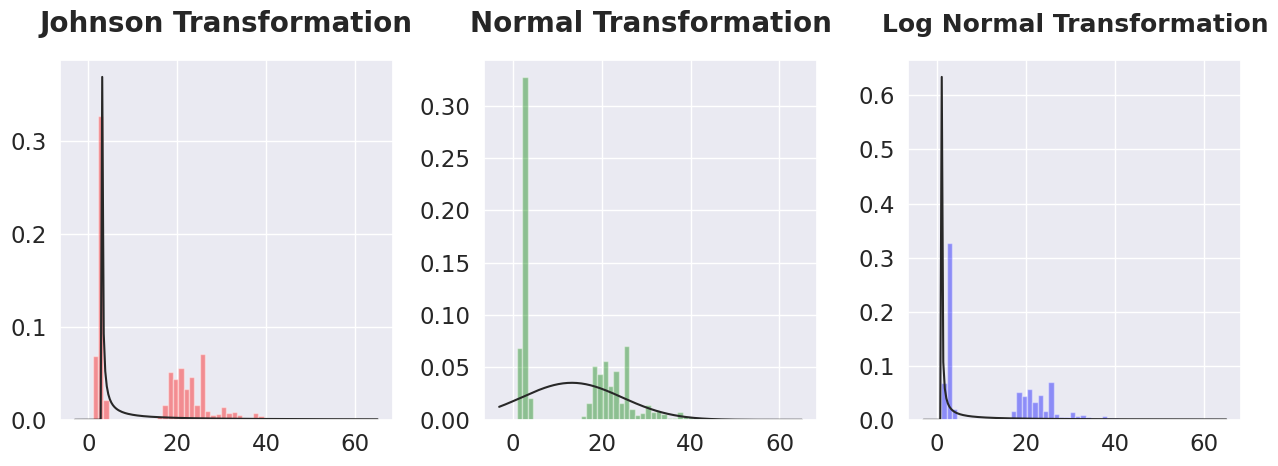

In [58]:
cols = ["Age","NCP"]
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.distplot(df[cols],kde=False, fit=stats.johnsonsu,color="red")
plt.title("Johnson Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,2)
sns.distplot(df[cols],kde=False, fit=stats.norm,color="green")
plt.title("Normal Transformation",fontweight="black",size=20,pad=20)

plt.subplot(1,3,3)
sns.distplot(df[cols],kde=False,fit=stats.lognorm,color="blue")
plt.title("Log Normal Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()

#### After applying different transformation techniques the best result were given by `Log Normal Transformation`

In [59]:
droped_df=df.dropna()

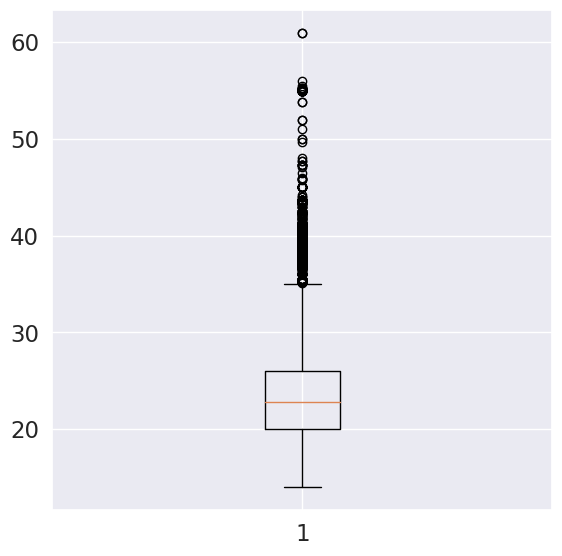

In [60]:
# Boxplot before removing outliers for Age
droped_df = droped_df.sort_values(by=['Age']) #sort the Age column
fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_axes([0,0,1,1])
bp4 = ax4.boxplot(droped_df['Age'])

In [61]:
# from scipy.stats import boxcox
# df['Age'], _ = boxcox(df['Age'])
# cols = ["Age","NCP"]
# for value in cols:
#     df[value] = np.log(1+df[value])
df["Age"].skew()

1.5862517094133515

In [62]:
# Remove outliers for Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
filter_mask = (df['Age'] >= Q1 - 1.5*IQR) & (df['Age'] <= Q3 + 1.5*IQR)
outliersToBeDropped =df.shape[0] - df.loc[filter_mask].shape[0]
print(f'we will drop {outliersToBeDropped} rows')
droped_df = df.loc[filter_mask]

we will drop 1074 rows


In [63]:
# cols = ["Age","NCP"]
# for value in cols:
#     df[value] = np.log(1+df[value])

In [64]:
# from scipy.stats import boxcox
# df['Age'], _ = boxcox(df['Age'])


In [65]:
# df["Age"].skew()

In [66]:
df["NCP"].skew()

-1.5376681526603722

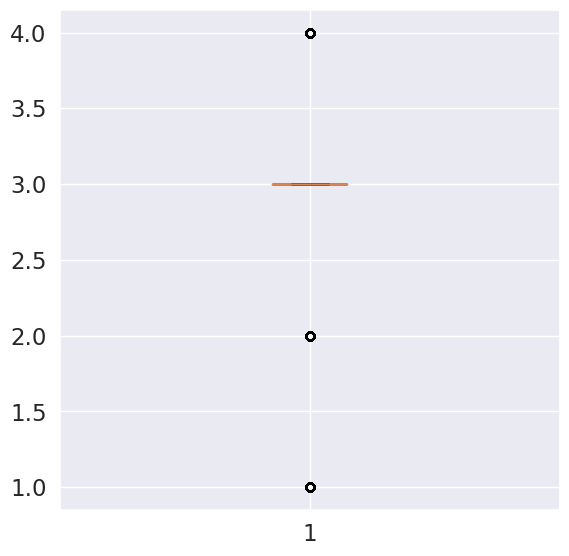

In [67]:
# Boxplot before removing outliers for NCP
droped_df = droped_df.sort_values(by=['NCP']) #sort the NCP column
fig4 = plt.figure(figsize=(5,5))
ax4 = fig4.add_axes([0,0,1,1])
bp4 = ax4.boxplot(droped_df['NCP'])

In [68]:
# Calculate skewness
skewness_before = df['NCP'].skew()
print("Skewness before removing outliers:", skewness_before)

# Remove outliers for NCP
Q1 = df['NCP'].quantile(0.25)
Q3 = df['NCP'].quantile(0.75)
IQR = Q3 - Q1
filter_mask = (df['NCP'] >= Q1 - 1.5*IQR) & (df['NCP'] <= Q3 + 1.5*IQR)
outliersToBeDropped = df.shape[0] - df.loc[filter_mask].shape[0]
print(f'we will drop {outliersToBeDropped} rows')
filtered_df = df.loc[filter_mask]

# Calculate skewness after removing outliers
skewness_after = filtered_df['NCP'].skew()
print("Skewness after removing outliers:", skewness_after)


Skewness before removing outliers: -1.5376681526603722
we will drop 4449 rows
Skewness after removing outliers: 0


In [69]:
for value in cols:
    df[value] = np.log(1+df[value])

In [70]:
from scipy.stats import boxcox
df['NCP'], _ = boxcox(df['NCP'])


In [71]:
df["NCP"].skew()


-0.1998533217742077

In [72]:
columns_to_drop = ['BMI', 'Age', 'id','NObesity_numeric']
def drop_columns(data, columns_to_drop):
    data.drop(columns=columns_to_drop, axis=1, inplace=True)
    return data

df = drop_columns(df, columns_to_drop)

In [73]:
df.head(2)

Gender    Height    Weight family_history_with_overweight FAVC  FCVC  \
0    Male  1.699998  81.66995                            yes  yes     2   
1  Female  1.560000  57.00000                            yes  yes     2   

        NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
0  0.785449   Sometimes    no     3  no    0    1  Sometimes   
1  0.785449  Frequently    no     2  no    1    1         no   

                  MTRANS           NObeyesdad  Weight_Status Age_Group  \
0  Public_Transportation  Overweight_Level_II     Overweight     19-35   
1             Automobile        Normal_Weight  Normal Weight      0-18   

   Age_Squared  
0   597.460787  
1   324.000000

## Feature Encoding

In [74]:
y=df["NObeyesdad"]
X=df.drop("NObeyesdad",axis=1)
encoder= LabelEncoder()
y=encoder.fit_transform(y)

In [75]:
num_cols=X.select_dtypes(include=['float','int']).columns
cat_cols=X.select_dtypes(include=["object","category"]).columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [76]:
transformed_data =preprocessor.fit_transform(X)
transformed_column_names =preprocessor.get_feature_names_out()
transformed_df =pd.DataFrame(columns=transformed_column_names,data=transformed_data)
transformed_df.head(2)

num__Height  num__Weight  num__FCVC  num__NCP  num__CH2O  num__FAF  \
0    -0.002828    -0.235713  -0.794869  0.222521   1.387962 -1.135638   
1    -1.606291    -1.170931  -0.794869  0.222521  -0.080131  0.016653   

   num__TUE  num__Age_Squared  cat__Gender  \
0   0.57227         -0.010143          1.0   
1   0.57227         -0.844725          0.0   

   cat__family_history_with_overweight  cat__FAVC  cat__CAEC  cat__SMOKE  \
0                                  1.0        1.0        2.0         0.0   
1                                  1.0        1.0        1.0         0.0   

   cat__SCC  cat__CALC  cat__MTRANS  cat__Weight_Status  cat__Age_Group  
0       0.0        1.0          3.0                 1.0             1.0  
1       0.0        2.0          0.0                 0.0             0.0

In [77]:
transformed_df.shape

(20758, 18)

In [78]:
X=transformed_df
X.head(3)

num__Height  num__Weight  num__FCVC  num__NCP  num__CH2O  num__FAF  \
0    -0.002828    -0.235713  -0.794869  0.222521   1.387962 -1.135638   
1    -1.606291    -1.170931  -0.794869  0.222521  -0.080131  0.016653   
2     0.128451    -1.430012  -0.794869 -2.068778  -0.080131  0.016653   

   num__TUE  num__Age_Squared  cat__Gender  \
0  0.572270         -0.010143          1.0   
1  0.572270         -0.844725          0.0   
2  2.097392         -0.844725          0.0   

   cat__family_history_with_overweight  cat__FAVC  cat__CAEC  cat__SMOKE  \
0                                  1.0        1.0        2.0         0.0   
1                                  1.0        1.0        1.0         0.0   
2                                  1.0        1.0        2.0         0.0   

   cat__SCC  cat__CALC  cat__MTRANS  cat__Weight_Status  cat__Age_Group  
0       0.0        1.0          3.0                 1.0             1.0  
1       0.0        2.0          0.0                 0.0             0.0  
2       0.0        2.0          3.0                 2.0             0.0

# Model Creation & Evaluation

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,classification_report


In [80]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2 ,random_state=0)

In [81]:
# def evaluate_classification_models(X, y, num_folds=5):
#     models = [
#         LogisticRegression(),
#         DecisionTreeClassifier(random_state=42,max_depth=50),
#         RandomForestClassifier(n_estimators=1400, random_state=42,max_depth=50),
#         XGBClassifier(n_estimators=1400, max_depth=50, learning_rate=0.01, random_state=42),
#         GradientBoostingClassifier(n_estimators=1400, max_depth=50, learning_rate=0.01,random_state=42),
#         LGBMClassifier(n_estimators=1400,max_depth=50,learning_rate=0.01,num_leaves=31,random_state=42)
#     ]

#     results = {}
#     for model in models:
#         model_name = model.__class__.__name__
#         cv_scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')
#         accuracy_scores = cv_scores
#         avg_accuracy = np.mean(accuracy_scores)
#         results[model_name] = avg_accuracy

#     return results

# results_classification = evaluate_classification_models(X_train,y_train)

# # Print the accuracy for each classification model
# for model_name, accuracy in results_classification.items():
#     print(f"{model_name} - Accuracy: {accuracy}")

In [82]:
# Create and fit the LightGBM model
lgbm_model = LGBMClassifier(
    n_estimators=1400,
    max_depth=50,
    learning_rate=0.01,
    num_leaves=31,
    random_state=42
)
lgbm_model.fit(X_train, y_train)
y_pred=lgbm_model.predict(X_test)
test_score =lgbm_model.score(X_test, y_test)
print("Test set score:", test_score)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 816
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 18
[LightGBM] [Info] Start training from score -2.094366
[LightGBM] [Info] Start training from score -1.912860
[LightGBM] [Info] Start training from score -1.964755
[LightGBM] [Info] Start training from score -1.863915
[LightGBM] [Info] Start training from score -1.634499
[LightGBM] [Info] Start training from score -2.139374
[LightGBM] [Info] Start training from score -2.110635
[LightGBM]

In [83]:
report = classification_report(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

# classification report
print(report)

0.9019749518304432
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       478
           1       0.88      0.87      0.88       630
           2       0.91      0.87      0.89       582
           3       0.97      0.96      0.96       673
           4       1.00      1.00      1.00       807
           5       0.77      0.79      0.78       472
           6       0.80      0.82      0.81       510

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [84]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
# Assuming you have identified class label 6 in your test set
num_classes = 7  # Update the number of classes

cat_params = {
    "verbose" : 0,
}

lgb_params = {
    "boosting_type":'gbdt',
    "learning_rate" : 0.1,
    "n_estimators":200,
    "objective":'binary',
    "class_weight":'balanced',
    "colsample_bytree":1,
    "subsample":1,
    "min_child_samples":10,
    "random_state":42,
    "n_jobs":-1
}

xgb_params = {
    "objective":'binary:logistic',
    "max_depth":6,
    "learning_rate":0.2,
    "n_estimators":200,
    "subsample":1,
    "colsample_bytree":1,
    "gamma":0,
    "random_state":42,
    "n_jobs":-1
}
gb_params = {
    'n_estimators': 100,           # Number of boosting stages to be run
    'learning_rate': 0.1,         # Step size shrinkage used to prevent overfitting
    'max_depth': 3,               # Maximum depth of the individual trees
    'min_samples_split': 2,       # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,        # Minimum number of samples required to be at a leaf node
    'subsample': 1.0,             # Fraction of samples used for fitting the trees
    'max_features': None,         # Number of features to consider for the best split, None means all features
    'random_state': 42            # Seed for reproducibility
}
rf_params = {
    'n_estimators': 100,          # Number of trees in the forest
    'criterion': 'gini',         # Criterion used for splitting ('gini' or 'entropy')
    'max_depth': None,            # Maximum depth of the trees, None means unlimited
    'min_samples_split': 2,       # Minimum number of samples required to split an internal node
    'min_samples_leaf': 1,        # Minimum number of samples required to be at a leaf node
    'max_features': 'auto',       # Number of features to consider for the best split ('auto', 'sqrt', 'log2', None, int, or float)
    'bootstrap': True,            # Whether bootstrap samples are used when building trees
    'random_state': 42            # Seed for reproducibility
}

models = {
    "xgb" : OneVsOneClassifier(XGBClassifier(**xgb_params)),
    # "lgb" : LGBMClassifier(**lgb_params),
    # "cat" : OneVsOneClassifier(CatBoostClassifier(**cat_params)),
    "grid":OneVsRestClassifier(GradientBoostingClassifier(**gb_params)),
    "logic" : LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),  # Specify 'ovr' for binary classification
    # "logic" : OneVsOneClassifier(LogisticRegression(random_state=42, max_iter=1000)),  # Specify 'ovr' for binary classification
    "Random":RandomForestClassifier(**rf_params),
    "ada":OneVsOneClassifier(AdaBoostClassifier(n_estimators=100)),
    "Tree": DecisionTreeClassifier(),
    # "bays ":OneVsOneClassifier(GaussianNB()),
    # "svc":OneVsRestClassifier(SVC()),
    # "svc":  OneVsOneClassifier(SVC()),
    # "KNeighbor":OneVsOneClassifier(KNeighborsClassifier(n_neighbors=3))
}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

colors = {
    'bold': '\033[1m',
    'red': '\033[91m',
    'green': '\033[92m',
    'purple': '\033[95m',
    'orange': '\033[93m',
    'yellow': '\033[93m',
    'reset': '\033[0m'
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    warnings.filterwarnings("ignore")
    pred = model.predict(X_test)
    # pred = pred.astype(int)
    accuracy = accuracy_score(y_test, pred)
    # precision = precision_score(y_test, pred)
    # recall = recall_score(y_test, pred)
    # roc_auc = roc_auc_score(y_test, pred)
    # f1 = f1_score(y_test, pred, average='micro')  # Use y_test and pred for F1 score calculation

    # print(f"{colors['purple']}F1 Score: {f1:.2f}{colors['reset']}")
    print(f"{colors['green']}Accuracy: {accuracy:.2f}{colors['reset']}")
    # print(f"{colors['red']}Precision: {precision:.2f}{colors['reset']}")
    # print(f"{colors['yellow']}Recall: {recall:.2f}{colors['reset']}")
    # print(f"{colors['purple']}F1 Score: {f1:.2f}{colors['reset']}")
    # print(f"{colors['orange']}ROC AUC Score: {roc_auc:.2f}{colors['reset']}")
    print("\n")
    print(model_name)
    # cm = confusion_matrix(y_test, pred)  # Use y_test and pred for confusion matrix
    # plt.figure(figsize=(6, 5))
    # sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    # plt.show()



Accuracy: 0.90


xgb
Accuracy: 0.89


grid
Accuracy: 0.80


logic
Accuracy: 0.90


Random
Accuracy: 0.89


ada
Accuracy: 0.85


Tree


# ⚡️ Model evaluation

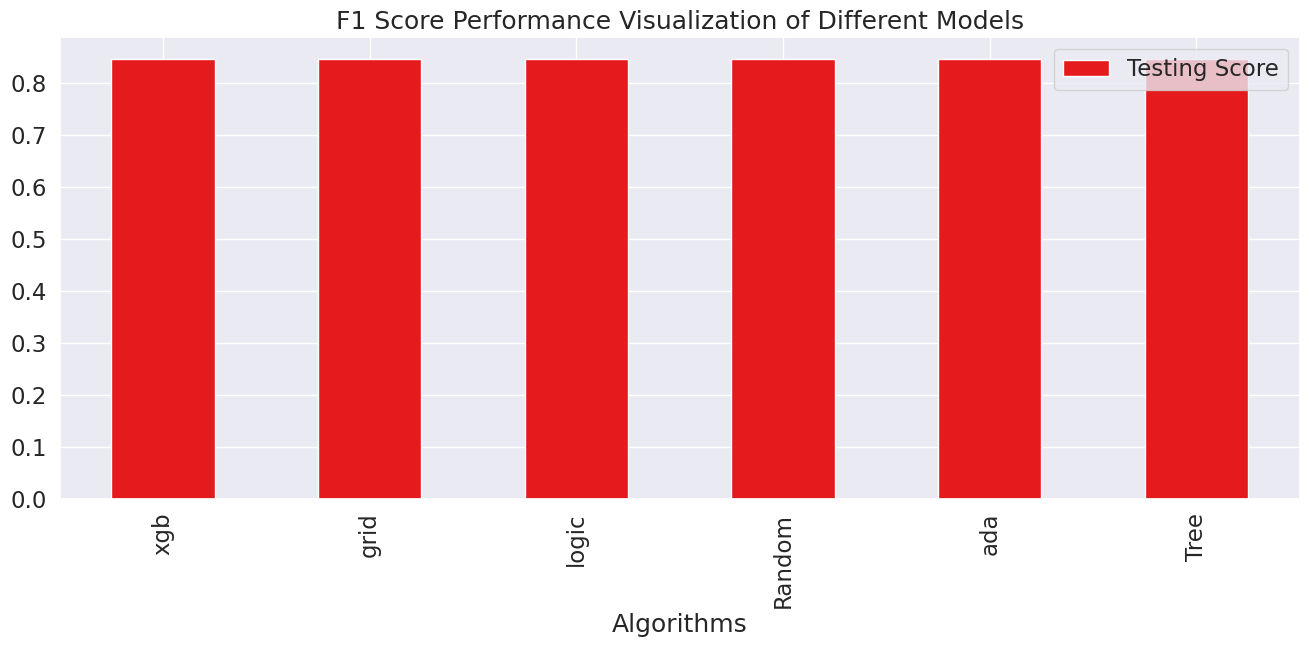

In [85]:
models = ["xgb","grid","logic","Random","ada","Tree"]
df=pd.DataFrame({"Algorithms":models ,
                 "Testing Score":accuracy})
df.plot(x="Algorithms",y=["Testing Score"], figsize=(16,6),kind="bar",
        title="F1 Score Performance Visualization of Different Models",colormap="Set1")
plt.show()

# 🍀 Stacking Model

In [86]:
from sklearn.ensemble import StackingClassifier

In [87]:
m1=LogisticRegression(),
m2=DecisionTreeClassifier(random_state=42,max_depth=50)
m3=RandomForestClassifier(n_estimators=1400, random_state=42,max_depth=50)
m4=XGBClassifier(n_estimators=1400, max_depth=50, learning_rate=0.01, random_state=42)
m5=GradientBoostingClassifier(n_estimators=1400, max_depth=50, learning_rate=0.01,random_state=42)
m6=LGBMClassifier(n_estimators=1400,max_depth=50,learning_rate=0.01,num_leaves=31,random_state=42,force_col_wise=True)

In [88]:
# stacking_model = StackingClassifier(estimators=[('xgb',m4 ),
#                                                 ('grid', m5),
#                                                 ('Random', m3),
#                                                 (' LGB',m6)])
# stacking_model.fit(X_train,y_train)
# x_test_pred4=stacking_model.predict(X_test)
# # pred = pred.astype(int)
# accuracy = accuracy_score(y_test,x_test_pred4)
# print(accuracy)


# NN

In [89]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Shape of X_train: (16606, 18)
Shape of X_test: (4152, 18)
Shape of y_train: (16606,)
Shape of y_test: (4152,)
Unique values in y_train: [0 1 2 3 4 5 6]
Unique values in y_test: [0 1 2 3 4 5 6]


In [90]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import  StratifiedGroupKFold,cross_val_score
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.01

# Create the model
model = Sequential()

# Input layer and dropout
input_shape = (X_train.shape[1],)
model.add(Dense(256, input_shape=input_shape, activation='relu'))
model.add(Dropout(0.5))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(7, activation='softmax'))

# Compile the model with Adam optimizer and sparse_categorical_crossentropy loss
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4864      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 7)                 1

In [92]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=10,
                                            factor=0.5,
                                            min_lr=0.00001,
                                            verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with training data and callbacks
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction, early_stopping])


Epoch 1/200
519/519 [==============================] - 4s 6ms/step - loss: 0.6907 - accuracy: 0.7358 - val_loss: 0.4554 - val_accuracy: 0.8432 - lr: 0.0100
Epoch 2/200
519/519 [==============================] - 2s 3ms/step - loss: 0.5304 - accuracy: 0.8098 - val_loss: 0.4722 - val_accuracy: 0.8456 - lr: 0.0100
Epoch 3/200
519/519 [==============================] - 2s 4ms/step - loss: 0.5091 - accuracy: 0.8236 - val_loss: 0.4589 - val_accuracy: 0.8459 - lr: 0.0100
Epoch 4/200
519/519 [==============================] - 2s 4ms/step - loss: 0.4903 - accuracy: 0.8261 - val_loss: 0.4516 - val_accuracy: 0.8442 - lr: 0.0100
Epoch 5/200
519/519 [==============================] - 1s 3ms/step - loss: 0.4851 - accuracy: 0.8311 - val_loss: 0.4258 - val_accuracy: 0.8586 - lr: 0.0100
Epoch 6/200
519/519 [==============================] - 1s 3ms/step - loss: 0.4791 - accuracy: 0.8342 - val_loss: 0.4630 - val_accuracy: 0.8485 - lr: 0.0100
Epoch 7/200
519/519 [==============================] - 2s 3ms/st

In [93]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

130/130 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8711
Test Loss: 0.3711
Test Accuracy: 0.8711


In [94]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y_one_hot)